In [180]:
# Import Libraries
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt

#show plot in notebook
%matplotlib inline 

#limits amount of lines pandas prints out
from pandas import set_option 
set_option('display.max_rows', 15)

#Plot #1: I chose to visualize the data using a scatter plot, with the month on the x-axis and the Sales on the y-axis. This plot shows the distribution of sales per month in the business year clearly. You are able to see which months yielded the most sales and which months had fewer sales.

In [181]:
#creating a string that contains the filename, for when a file name is very long. Makes it more readable.
filename = 'Sales Data.xlsm'

df = pd.read_excel(filename, sheetname = '2013 - 2014', index_col='Date')
#To load dataset from excel into python, specified taking data from one sheet called '2013 -2014'
# Also making the column date the index column

# Creating a new column in the data set, which puts all sales amounts in Canadian dollars. 
df['Sales in CAD'] = df['Exchange rate'] * df['Sales Amount'] 
df

,Exchange rate,Location,Customer,Field,Sales Amount,Year of first order,Sales in CAD
Date,,,,,,,
2013-08-07,1.074,NaN,Wyle Laboratories,aerospace,1433.00,2013-06-01 00:00:00,1539.042
2013-08-12,1.074,NaN,Southwest Research,aerospace,1313.00,2011-02-01 00:00:00,1410.162
2013-08-16,1.074,NaN,Space Exploration,aerospace,116.00,2009-07-01 00:00:00,124.584
2013-10-09,1.074,NaN,Dynamo Aviation,aerospace,8550.00,2011-09-01 00:00:00,9182.700
2013-10-30,1.074,NaN,Dynamo Aviation,aerospace,3350.00,2011-09-01 00:00:00,3597.900
2014-01-09,1.074,NaN,Southwest Research,aerospace,4402.00,2011-02-01 00:00:00,4727.748
2014-02-19,1.074,NaN,Dynamo Aviation,aerospace,1882.00,2011-09-01 00:00:00,2021.268
...,...,...,...,...,...,...,...
2013-12-10,1.074,NaN,FCI Watermakers,water systems,861.00,2013-08-01 00:00:00,924.714


In [182]:
# Data will be downsampled to month, takin the sum of the Sales in each month. 
df_resampled = df.resample('M', how=('sum'))     
df_resampled

,Exchange rate,Sales Amount,Sales in CAD
Date,,,
2013-08-31,19.814,78196.70,81819.96200
2013-09-30,14.592,55701.32,58372.19460
2013-10-31,23.110,106408.05,113018.98208
2013-11-30,23.201,98597.66,104607.67808
2013-12-31,14.740,77714.56,82281.35900
2014-01-31,21.221,45705.70,48638.68038
2014-02-28,17.740,55326.27,58753.82124
2014-03-31,26.036,87786.08,91829.31198
2014-04-30,8.514,35409.37,37829.22190


In [183]:
# To reset the index to numbers and make Date a regular column again after the resampling.
df_resampled = df_resampled.reset_index()
df_resampled

,Date,Exchange rate,Sales Amount,Sales in CAD
0,2013-08-31,19.814,78196.70,81819.96200
1,2013-09-30,14.592,55701.32,58372.19460
2,2013-10-31,23.110,106408.05,113018.98208
3,2013-11-30,23.201,98597.66,104607.67808
4,2013-12-31,14.740,77714.56,82281.35900
5,2014-01-31,21.221,45705.70,48638.68038
6,2014-02-28,17.740,55326.27,58753.82124
7,2014-03-31,26.036,87786.08,91829.31198
8,2014-04-30,8.514,35409.37,37829.22190
9,2014-05-31,24.275,71617.40,75410.91760


In [184]:
# To rename the column names
df_resampled.columns = [['Date', 'Exchange_Rate', 'Sales_Amount', 'Sales_in_CAD']]

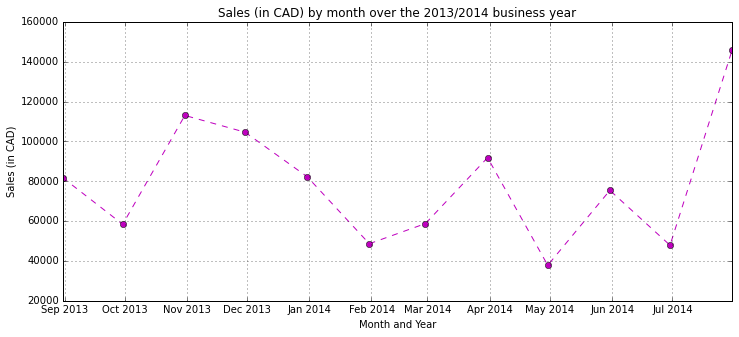

In [185]:
#change figure size
plt.figure(figsize=(12,5)) # in inches, width then height. Text stays the same size.

# add data to plot 
plt.plot(df_resampled.Date, df_resampled.Sales_in_CAD, marker='o', color ='m', linestyle='--')   
#First statement is y axis of the file, Second statment is x - axis
#Marker, color, linestyle change the format of the plot

#Add title
plt.title('Sales (in CAD) by month over the 2013/2014 business year')

#Add gridlines
plt.grid(True)

#Add axis labels
plt.ylabel('Sales (in CAD)')
plt.xlabel('Month and Year')

#To save figure. MUST SAVE FIGURE BEFORE SHOWING FIGURE ORELSE IT WONT WORK.
plt.savefig('Sales_over_time.pdf')

#Show plot 
plt.show()  

#Plot #2: This plot was supposed to create a bar graph with the Field on the x-axis and the sales on the Y-axis. This would visualize how many sales the company has in each Field over the business year. 

In [186]:
#Make groupby object which represents groups in the column Fields
#Group by some sort of category. In this case grouping by Field. 
resampled_groups = df.groupby(['Field', 'Sales in CAD']).sum()
resampled_groups

Exchange rate  Sales Amount
Field         Sales in CAD                             
aerospace     124.584               1.074        116.00
              1410.162              1.074       1313.00
              1431.642              1.074       1333.00
              1539.042              1.074       1433.00
              1541.680              1.000       1541.68
              2021.268              1.074       1882.00
              3078.084              1.074       2866.00
...                                   ...           ...
water systems 1743.010              1.000       1743.01
              1849.428              1.074       1722.00
              1861.242              1.074       1733.00
              1933.200              1.074       1800.00
              3436.800              1.074       3200.00
              6767.200              1.000       6767.20
              13274.640             1.074      12360.00

[208 rows x 2 columns]

In [214]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# the data
N = 16
Field = resampled_groups.loc[:, 0]
Sales = resampled_groups.loc[:, 1]

# necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.4                      # the width of the bars

# the bar. This function creates the bar plot. 
bar = ax.bar(ind, Field, width, color='black', yerr=Sales, error_kw=dict(elinewidth=2,ecolor='red'))

# axes and labels
ax.set_ylabel('Sales (in CAD)')
ax.set_title('Sales in each Field')


plt.show()

KeyError: 'the label [0] is not in the [columns]'

In [187]:
# To reset the index to numbers and make Date a regular column again after the resampling.
resampled_groups = resampled_groups.reset_index()
resampled_groups

,Field,Sales in CAD,Exchange rate,Sales Amount
0,aerospace,124.584,1.074,116.00
1,aerospace,1410.162,1.074,1313.00
2,aerospace,1431.642,1.074,1333.00
3,aerospace,1539.042,1.074,1433.00
4,aerospace,1541.680,1.000,1541.68
5,aerospace,2021.268,1.074,1882.00
6,aerospace,3078.084,1.074,2866.00
...,...,...,...,...
201,water systems,1743.010,1.000,1743.01
202,water systems,1849.428,1.074,1722.00


# Plot #3: This plot was supposed to sort the year of first order by year, to later make a bar graph. The bar graph would show the year of first order on the x-axis with the Sales on the y-axis. This would show how many customers in this business year are new customers and which are returning customers.

In [205]:
# To rename the column names
df.columns = [['Exchange_Rate', 'Location', 'Customer', 'Field', 'Sales_Amount', 'Year_first_Order', 'Sales_CAD']]

df = pd.read_excel(filename, sheetname = '2013 - 2014', index_col='Year of first order')
#To load dataset from excel into python, specified taking data from one sheet called '2013 -2014'
# Also making the column date the index column

# Creating a new column in the data set, which puts all sales amounts in Canadian dollars. 
df['Sales in CAD'] = df['Exchange rate'] * df['Sales Amount'] 
df

,Exchange rate,Location,Date,Customer,Field,Sales Amount,Sales in CAD
Year of first order,,,,,,,
2013-06-01,1.074,NaN,2013-08-07,Wyle Laboratories,aerospace,1433.00,1539.042
2011-02-01,1.074,NaN,2013-08-12,Southwest Research,aerospace,1313.00,1410.162
2009-07-01,1.074,NaN,2013-08-16,Space Exploration,aerospace,116.00,124.584
2011-09-01,1.074,NaN,2013-10-09,Dynamo Aviation,aerospace,8550.00,9182.700
2011-09-01,1.074,NaN,2013-10-30,Dynamo Aviation,aerospace,3350.00,3597.900
2011-02-01,1.074,NaN,2014-01-09,Southwest Research,aerospace,4402.00,4727.748
2011-09-01,1.074,NaN,2014-02-19,Dynamo Aviation,aerospace,1882.00,2021.268
...,...,...,...,...,...,...,...
2013-08-01,1.074,NaN,2013-12-10,FCI Watermakers,water systems,861.00,924.714


In [208]:
# Data will be downsampled to month, takin the sum of the Sales in each month. 
Resampled_Firstorder = df.resample('A', how=('mean'))     
Resampled_Firstorder

TypeError: unorderable types: datetime.datetime() > int()